In [ ]:
#Monte-Carlo simulations repeatedly sample uncertain inputs to map
#an expected profit distribution, and by incorporating
#control variates—auxiliary variables with known expectations—they sharply
# reduce the estimator’s variance for more precise results.
#We sell a product at $20 but it costs $12 to stock.
#We have already ordered q = 100 units for the season.
#Random demand 𝐷∼𝑁(𝜇=100,𝜎=30)D∼N(μ=100,σ=30).
#Profit(D)=20min(D,q)−12q


In [2]:
#2 Plain Monte-Carlo
import numpy as np
rng = np.random.default_rng(seed=42)

# parameters
price, cost, q = 20, 12, 100
mu, sigma = 100, 30
N = 100_000            # replications

# simulate demand and profit
D = rng.normal(mu, sigma, N)
profit = price * np.minimum(D, q) - cost * q

# estimate mean, 95 % CI
mean_hat  = profit.mean()
se_hat    = profit.std(ddof=1) / np.sqrt(N)
ci95      = (mean_hat - 1.96*se_hat, mean_hat + 1.96*se_hat)


(np.float64(556.7305602206504), np.float64(561.0961881362732))

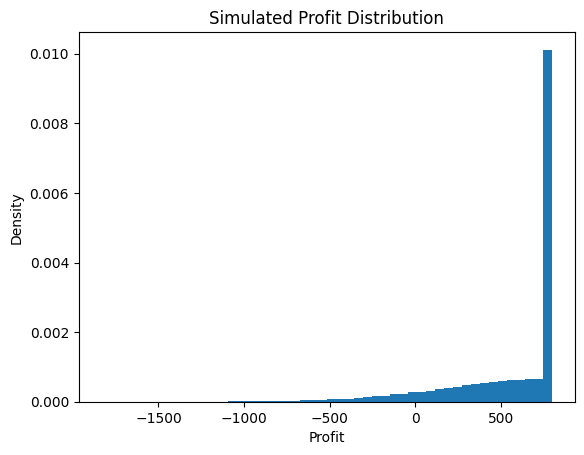

In [3]:
#3 Control variate for variance reduction
import matplotlib.pyplot as plt
plt.hist(profit, bins=50, density=True)
plt.xlabel("Profit"); plt.ylabel("Density")
plt.title("Simulated Profit Distribution")
plt.show()


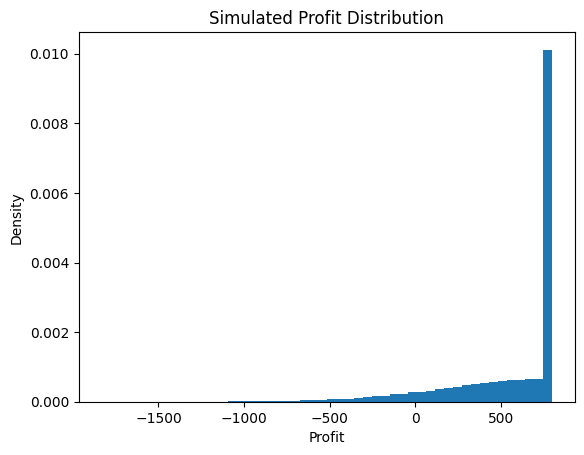

In [4]:
#4 Profit distribution visualised
import matplotlib.pyplot as plt
plt.hist(profit, bins=50, density=True)
plt.xlabel("Profit"); plt.ylabel("Density")
plt.title("Simulated Profit Distribution")
plt.show()


In [5]:
"""
Monte-Carlo Simulations, Expected Profit Distributions, and Control Variates
---------------------------------------------------------------------------

• Monte-Carlo simulation:
  Repeatedly draw *uncertain inputs* from their probability laws and push
  them through the model to approximate expectations numerically.

• Uncertain inputs (here):
  Demand D ~ 𝓝(μ, σ²).  All randomness lives here.

• Expected profit distribution:
  The distribution of π = price·min(D,q) – cost·q across all draws.
  Its mean  E[π]  is the number we want, but the whole distribution
  (histogram, percentiles, tail risk) is available.

• Control variates:
  Variance-reduction trick.  Add a correlated auxiliary variable Z whose
  true mean is known; optimally re-weight to shrink the estimator’s
  variance without changing its expectation.

  In this news-vendor toy model we simply pick   Z ≡ D
  because   E[D] = μ   is known in closed form and Cov(π,D) ≠ 0.
"""

import numpy as np
rng = np.random.default_rng(seed=42)

# ---------------------------------------------------------------------------
# 1. Economic inputs  (all units are “per unit” or “units of product”)
# ---------------------------------------------------------------------------
price, cost, q = 20, 12, 100     # selling price, purchase cost, order qty
mu, sigma      = 100, 30         # demand ~ Normal(μ, σ²)
N              = 100_000         # Monte-Carlo replications
# ---------------------------------------------------------------------------

# ------------------- Plain Monte-Carlo estimator ---------------------------
D       = rng.normal(mu, sigma, N)                     # uncertain demand
profit  = price * np.minimum(D, q) - cost * q          # realised profit
mean_mc = profit.mean()                                # Ê[π]
se_mc   = profit.std(ddof=1) / np.sqrt(N)              # standard error
# ---------------------------------------------------------------------------

# ------------------- Control-variates estimator ----------------------------
Z     = D                                              # auxiliary variable
beta  = np.cov(profit, Z, ddof=1)[0, 1] / np.var(Z, ddof=1)   # optimal β*
profit_cv = profit - beta * (Z - mu)                   # re-weighted profit
mean_cv   = profit_cv.mean()
se_cv     = profit_cv.std(ddof=1) / np.sqrt(N)
vr_factor = (se_mc / se_cv) ** 2                       # ≈ how many times
# ---------------------------------------------------------------------------

# ------------------- Report -------------------------------------------------
print("Plain MC :  E[π] ≈ "
      f"{mean_mc:,.2f}  ± 1.96·SE → "
      f"[{mean_mc - 1.96*se_mc:,.2f}, {mean_mc + 1.96*se_mc:,.2f}]")

print("With CV  :  E[π] ≈ "
      f"{mean_cv:,.2f}  ± 1.96·SE → "
      f"[{mean_cv - 1.96*se_cv:,.2f}, {mean_cv + 1.96*se_cv:,.2f}]")

print(f"Variance-reduction factor ≈ {vr_factor:,.1f}×  "
      "(> 1 means the control variate helped)")
# ---------------------------------------------------------------------------


Plain MC :  E[π] ≈ 558.91  ± 1.96·SE → [556.73, 561.10]
With CV  :  E[π] ≈ 560.18  ± 1.96·SE → [559.06, 561.31]
Variance-reduction factor ≈ 3.7×  (> 1 means the control variate helped)
